In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
house_df = pd.read_csv("raw_house_data - raw_house_data.csv")


## Features:
+ **MLS:** Multiple Listing Service Unique number
+ **sold_price:**
+ **zipcode:**
+ **longitude:** geographic coordinate
+ **latitude:** geographic cordinate
+ **lot_acres:**
+ **taxes:**
+ **year_built:**
+ **bedrooms:**
+ **bathrooms:**
+ **sqrt_ft:**
+ **garage:**
+ **kitchen_features:**
+ **fireplace:**
+ **floor_covering:**
+ **HOA:**


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(9), int64(4), object(3)
memory 

In [5]:
house_df.describe().round(2)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
count,5000.00,5000.00,5000.00,5000.00,5000.00,4990.00,5000.00,5000.00,5000.00,4994.00,4944.00,4993.00,4975.00
mean,21270699.22,774626.20,85723.03,-110.91,32.31,4.66,9402.83,1992.33,3.93,3.83,3716.37,2.82,1.89
std,2398507.68,318555.61,38.06,0.12,0.18,51.69,172938.53,65.49,1.25,1.39,1120.68,1.19,1.14
min,3042851.00,169000.00,85118.00,-112.52,31.36,0.00,0.00,0.00,1.00,1.00,1100.00,0.00,0.00
25%,21407176.50,585000.00,85718.00,-110.98,32.28,0.58,4803.61,1987.00,3.00,3.00,3047.00,2.00,1.00
50%,21614686.50,675000.00,85737.00,-110.92,32.32,0.99,6223.76,1999.00,4.00,4.00,3512.00,3.00,2.00
75%,21804801.75,835000.00,85749.00,-110.86,32.39,1.76,8082.83,2006.00,4.00,4.00,4130.25,3.00,3.00
max,21928565.00,5300000.00,86323.00,-109.45,34.93,2154.00,12215075.00,2019.00,36.00,36.00,22408.00,30.00,9.00


In [6]:
house_df.describe(include="O")

,kitchen_features,floor_covering,HOA
count,4967,4999,4438
unique,1871,310,380
top,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Ceramic Tile",0
freq,1719,1235,824


In [7]:
house_df.MLS.duplicated().any()

False

In [8]:
house_df.isna().sum(axis = 0)

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64

In [9]:
hoa_nan = house_df.HOA.isna()
hoa_zero = house_df.HOA == "0"

hoa_nan_zero_df = house_df.loc[hoa_nan|hoa_zero]
hoa_nan_zero_df.HOA.value_counts(dropna=False)

HOA
0      824
NaN    562
Name: count, dtype: int64

In [10]:
house_df[house_df.HOA == "0"].sold_price.sort_values(ascending=False)

0       5300000.0
1       4200000.0
15      2600000.0
18      2600000.0
20      2600000.0
          ...    
4086     440000.0
4932     435000.0
4863     425000.0
2651     425000.0
3345     416000.0
Name: sold_price, Length: 824, dtype: float64

There is a total of 1386 record with 0 or missing value for the HOA column. This is about 30% of the data. From this result, it is ok to take out the column

In [11]:
house_df.drop(columns="HOA", inplace=True)

## Inspect observations with Missing values or Zeros in the following columns
+ lot_acres
+ taxes
+ year_built
+ bedrooms
+ bathrooms
+ sqrt_ft
+ fireplaces

In [12]:
lot_acres_nan = house_df.lot_acres.isna()
lot_acres_zero = house_df.lot_acres == 0

lot_acres_nan_zero_df = house_df.loc[lot_acres_nan|lot_acres_zero]
lot_acres_nan_zero_df.lot_acres.value_counts(dropna=False)

lot_acres
0.0    35
NaN    10
Name: count, dtype: int64

In [13]:
lot_acres_nan_zero_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering
14,21534099,3000000.0,85739,-110.883068,32.508778,0.0,29669.00,2008,3,3.0,3095.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3.0,"Natural Stone, Wood"
15,21225585,2600000.0,85739,-110.883252,32.507699,0.0,18044.00,2008,3,3.0,3095.0,0.0,"Dishwasher, Freezer, Garbage Disposal, Refrige...",3.0,"Natural Stone, Wood"
18,21324339,2600000.0,85739,-110.883239,32.509040,0.0,17567.18,2008,3,3.0,3095.0,0.0,"Dishwasher, Refrigerator, Microwave, Oven",3.0,"Natural Stone, Wood"
20,21207846,2600000.0,85739,-110.883065,32.508778,0.0,8753.35,2008,3,3.0,3095.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3.0,"Natural Stone, Wood"
53,21424173,2150000.0,85739,-110.883660,32.509721,0.0,19060.81,2008,2,3.0,2729.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",2.0,"Natural Stone, Wood"
86,21230229,1700000.0,85718,-110.924011,32.341140,0.0,17874.58,2005,5,6.0,6719.0,4.0,"Compactor, Dishwasher, Garbage Disposal, Refri...",3.0,Natural Stone
176,21216789,1495000.0,85716,-110.922995,32.224182,0.0,5747.29,1968,6,6.0,4620.0,2.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4.0,Mexican Tile
363,21804473,1344000.0,85658,-111.095060,32.470843,0.0,846.03,2018,3,4.0,2329.0,2.0,"Dishwasher, Garbage Disposal, Island, Refriger...",1.0,Natural Stone
379,21731243,1330245.0,85658,-111.101549,32.470705,0.0,2037.47,2017,3,3.0,2400.0,2.0,"Dishwasher, Double Sink, Gas Range, Refrigerator",1.0,"Carpet, Natural Stone"
557,21613280,1075000.0,85737,-110.941999,32.397863,0.0,12477.95,2006,3,5.0,4468.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",1.0,Natural Stone


In [14]:
house_df["acre_to_square_ft"] = house_df.sqrt_ft.div(house_df.lot_acres,fill_value=0).round(2)

In [15]:
acre_to_sqrt_ft_df = house_df.loc[:,["lot_acres","sqrt_ft","acre_to_square_ft","bedrooms","bathrooms"]].sort_values(by=["bathrooms","bedrooms"], ascending=False)
acre_to_sqrt_ft_df.head(20)

,lot_acres,sqrt_ft,acre_to_square_ft,bedrooms,bathrooms
4663,1.07,3720.0,3476.64,5,36.0
2106,50.00,NaN,0.00,36,35.0
2111,50.00,22408.0,448.16,36,35.0
3277,50.00,21915.0,438.30,36,35.0
635,11.57,12154.0,1050.48,19,18.0
35,131.00,13000.0,99.24,13,15.0
969,0.49,2850.0,5816.33,18,14.0
4518,555.60,5800.0,10.44,11,11.0
151,8.80,10417.0,1183.75,7,11.0
0,2154.00,10500.0,4.87,13,10.0


In [16]:
acre_to_sqrt_ft_df.corr()

,lot_acres,sqrt_ft,acre_to_square_ft,bedrooms,bathrooms
lot_acres,1.000000,0.121918,-0.073211,0.069277,0.055080
sqrt_ft,0.121918,1.000000,-0.162245,0.590305,0.701917
acre_to_square_ft,-0.073211,-0.162245,1.000000,-0.097523,-0.080878
bedrooms,0.069277,0.590305,-0.097523,1.000000,0.687336
bathrooms,0.055080,0.701917,-0.080878,0.687336,1.000000


In [17]:
# From the result above number of bedrooms and bathrooms are in linear positive relationship with sqrt_ft. And no relationship with lot_acres. Hence i will drop the lot_acres column
house_df.drop(columns=["lot_acres", "acre_to_square_ft"], inplace=True)

In [18]:
taxes_nan = house_df.taxes.isna()
taxes_zero = house_df.taxes == 0

taxes_nan_zero_df = house_df.loc[taxes_nan|taxes_zero]
taxes_nan_zero_df.taxes.value_counts(dropna=False)

taxes
0.0    22
Name: count, dtype: int64

In [19]:
taxes_nan_zero_df

,MLS,sold_price,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering
101,21814436,1450000.0,85624,-110.738083,31.533643,0.0,1997,1,1.0,3576.0,0.0,Missing: All Appliances,0.0,Concrete
196,21624122,1547664.0,85719,-110.934183,32.244512,0.0,2016,2,3.0,3346.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",1.0,"Carpet, Natural Stone"
377,21706833,1408464.0,85719,-110.938327,32.242829,0.0,2016,2,3.0,3346.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",1.0,"Carpet, Natural Stone"
723,21624132,1048842.0,85719,-110.938291,32.242845,0.0,2016,2,3.0,3346.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",1.0,"Carpet, Natural Stone"
725,21730800,1069000.0,85719,-110.939051,32.243662,0.0,2018,3,3.0,3346.0,3.0,"Dishwasher, Freezer, Garbage Disposal, Gas Ran...",1.0,"Carpet, Natural Stone"
775,21730798,1007583.0,85719,-110.938306,32.243724,0.0,2018,3,3.0,3002.0,2.0,"Dishwasher, Garbage Disposal, Gas Range, Refri...",1.0,"Carpet, Wood, Other: Porcelain/Engineered"
800,21730799,972877.0,85719,-110.939406,32.243494,0.0,2018,3,3.0,3002.0,2.0,"Dishwasher, Garbage Disposal, Gas Range, Pantr...",1.0,"Carpet, Other: Porcelain"
909,21730830,985368.0,85719,-110.939446,32.243699,0.0,2018,3,3.0,3002.0,2.0,"Dishwasher, Garbage Disposal, Gas Range, Refri...",1.0,"Carpet, Wood, Other: Porcelain/Engineered"
930,21730801,950795.0,85719,-110.938701,32.243375,0.0,2018,3,3.0,2580.0,3.0,"Dishwasher, Garbage Disposal, Gas Range, Pantr...",1.0,"Carpet, Wood, Other: Porcelain/Engineered"
1066,21730831,900000.0,85719,-110.939027,32.243327,0.0,2018,3,3.0,2580.0,3.0,"Dishwasher, Freezer, Garbage Disposal, Gas Ran...",1.0,"Carpet, Natural Stone"


Taxes are often directly linked to the property's assessed value. A higher tax amount generally indicates a higher property value. Instead of removing or using the observations as this, I will create a bin for the house value and find the mean value for the bins

In [20]:
house_df.insert(loc= 2, column="price_cat", value=pd.qcut(house_df.sold_price,q=[0,0.25,0.5,0.75,0.95,1],labels=["Low", "Below_Average","Above_Average","High","Very_High"]))

In [21]:
house_df.price_cat

0       Very_High
1       Very_High
2       Very_High
3       Very_High
4       Very_High
          ...    
4995          Low
4996          Low
4997          Low
4998          Low
4999          Low
Name: price_cat, Length: 5000, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very_High']

In [22]:
#house_df.price_cat.value_counts()
house_df.price_cat.value_counts(normalize=True)

price_cat
Low              0.2536
Above_Average    0.2492
Below_Average    0.2474
High             0.2006
Very_High        0.0492
Name: proportion, dtype: float64

In [23]:
house_df.head()

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering
0,21530491,5300000.0,Very_High,85637,-110.378200,31.356362,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood"
1,21529082,4200000.0,Very_High,85646,-111.045371,31.594213,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other"
2,3054672,4200000.0,Very_High,85646,-111.040707,31.594844,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock"
3,21919321,4500000.0,Very_High,85646,-111.035925,31.645878,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood"
4,21306357,3411450.0,Very_High,85750,-110.813768,32.285162,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete"


In [24]:
house_df.loc[taxes_nan|taxes_zero].price_cat.value_counts()

price_cat
High             7
Above_Average    6
Low              3
Below_Average    3
Very_High        3
Name: count, dtype: int64

In [25]:
house_df.groupby("price_cat").taxes.transform("mean").round(2)

0       12709.56
1       12709.56
2       12709.56
3       12709.56
4       12709.56
          ...   
4995     5041.76
4996     5041.76
4997     5041.76
4998     5041.76
4999     5041.76
Name: taxes, Length: 5000, dtype: float64

In [26]:
#Update the taxes features with the group mean value of taxes based on house prices where taxes is equal zero.
house_df.loc[taxes_nan|taxes_zero,"taxes"] = house_df.groupby("price_cat").taxes.transform("mean").round(2)

In [27]:
house_df.loc[taxes_nan|taxes_zero].taxes.value_counts()

taxes
22112.07    7
6651.62     6
12709.56    3
5041.76     3
5681.74     3
Name: count, dtype: int64

In [28]:
house_df.loc[:,["sold_price","taxes"]].corr()

,sold_price,taxes
sold_price,1.00000,0.02352
taxes,0.02352,1.00000


In [29]:
year_built_nan = house_df.year_built.isna()
year_built_zero = house_df.year_built == 0

year_built_nan_zero_df = house_df.loc[year_built_nan|year_built_zero]
year_built_nan_zero_df.year_built.value_counts(dropna=False)

year_built
0    5
Name: count, dtype: int64

In [30]:
year_built_nan_zero_df

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering
35,21307177,2495000.0,Very_High,85637,-110.740635,31.720431,1220.32,0,13,15.0,13000.0,0.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",4.0,"Carpet, Ceramic Tile, Mexican Tile"
162,21207587,1210520.0,High,85658,-111.101588,32.468488,1412.75,0,4,5.0,3334.0,2.0,"Dishwasher, Refrigerator, Microwave, Oven",3.0,"Carpet, Natural Stone, Wood"
946,21608590,695000.0,Above_Average,85645,-111.183593,31.702330,2480.58,0,4,4.0,2272.0,2.0,"Dishwasher, Refrigerator, Oven",2.0,Ceramic Tile
1438,21702126,877170.0,High,85755,-110.977158,32.459429,2005.57,0,3,4.0,3078.0,3.0,"Dishwasher, Garbage Disposal, Microwave, Oven",0.0,Other
1767,21719857,700000.0,Above_Average,85701,-110.963672,32.216996,7059.56,0,3,3.0,2500.0,3.0,"Dishwasher, Electric Range, Garbage Disposal, ...",0.0,Other: Recycled Porcelain


In [31]:
house_df.year_built.sort_values().unique()

array([   0, 1893, 1900, 1901, 1902, 1905, 1907, 1910, 1911, 1913, 1914,
       1917, 1918, 1919, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940,
       1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019], dtype=int64)

In [32]:
year_built_arr = [ 0, 1893, 1900, 1901, 1902, 1905, 1907, 1910, 1911, 1913, 1914]

In [33]:
house_df.loc[house_df.year_built.isin(year_built_arr)].sort_values(by="price_cat",ascending=False)

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering
35,21307177,2495000.0,Very_High,85637,-110.740635,31.720431,1220.32,0,13,15.0,13000.0,0.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",4.0,"Carpet, Ceramic Tile, Mexican Tile"
157,21803903,1500000.0,Very_High,85701,-110.971896,32.212947,3296.75,1900,4,4.0,4572.0,0.0,"Dishwasher, Garbage Disposal, Gas Range, Refri...",2.0,"Concrete, Mexican Tile, Wood, Other: concrete ..."
162,21207587,1210520.0,High,85658,-111.101588,32.468488,1412.75,0,4,5.0,3334.0,2.0,"Dishwasher, Refrigerator, Microwave, Oven",3.0,"Carpet, Natural Stone, Wood"
234,21431206,1350000.0,High,85705,-110.962835,32.231948,7655.10,1911,6,5.0,5427.0,2.0,"Compactor, Dishwasher, Garbage Disposal, Refri...",4.0,"Carpet, Ceramic Tile, Wood"
906,21722438,945000.0,High,85705,-110.966564,32.232014,6303.09,1907,7,4.0,4268.0,4.0,"Dishwasher, Double Sink, Garbage Disposal, Isl...",2.0,"Carpet, Ceramic Tile, Wood"
1438,21702126,877170.0,High,85755,-110.977158,32.459429,2005.57,0,3,4.0,3078.0,3.0,"Dishwasher, Garbage Disposal, Microwave, Oven",0.0,Other
1767,21719857,700000.0,Above_Average,85701,-110.963672,32.216996,7059.56,0,3,3.0,2500.0,3.0,"Dishwasher, Electric Range, Garbage Disposal, ...",0.0,Other: Recycled Porcelain
1842,21206986,750000.0,Above_Average,85705,-110.966561,32.232013,5503.00,1902,4,2.0,4268.0,4.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",2.0,"Carpet, Ceramic Tile, Concrete, Wood"
1824,21819882,745000.0,Above_Average,85701,-110.975927,32.225816,3674.55,1901,4,3.0,3016.0,0.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Ceramic Tile, Wood"
1205,21522479,815000.0,Above_Average,85701,-110.972187,32.215268,4599.00,1893,5,3.0,3466.0,0.0,"Dishwasher, Refrigerator, Oven",2.0,"Ceramic Tile, Concrete, Wood, Other"


There no relationship between the price of houses and the age of house. We cannot remove the 5 observations where the year built is zero because the other features are correct. Hence we will leave it as is.

In [34]:
house_df.year_built.replace(to_replace=0,value=2023, inplace=True)

In [35]:
house_df["age"] = house_df.year_built.sub(2024).mul(-1)

In [36]:
house_df.loc[:,["sold_price","year_built","age"]].corr()

,sold_price,year_built,age
sold_price,1.000000,0.098725,-0.098725
year_built,0.098725,1.000000,-1.000000
age,-0.098725,-1.000000,1.000000


In [37]:
bedrooms_nan = house_df.bedrooms.isna()
bedrooms_zero = house_df.bedrooms == 0

bedrooms_nan_zero_df = house_df.loc[bedrooms_nan|bedrooms_zero]
bedrooms_nan_zero_df.bedrooms.value_counts(dropna=False)

Series([], Name: count, dtype: int64)

In [38]:
bedrooms_nan_zero_df

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,age


In [39]:
house_df.bedrooms.all()

True

In [40]:
bathrooms_nan = house_df.bathrooms.isna()
bathrooms_zero = house_df.bathrooms == 0

bathrooms_nan_zero_df = house_df.loc[bathrooms_nan|bathrooms_zero]
bathrooms_nan_zero_df.bathrooms.value_counts(dropna=False)

bathrooms
NaN    6
Name: count, dtype: int64

In [41]:
bathrooms_nan_zero_df

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,age
2025,3044867,660000.0,Below_Average,85614,-110.969465,31.836723,5526.00,2007,3,NaN,NaN,3.0,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",NaN,"Carpet, Other: Tile-Other",17
2766,3042851,575000.0,Low,85614,-110.960497,31.854446,4623.05,2002,3,NaN,NaN,3.0,"Dishwasher, Garbage Disposal, Gas Range, Islan...",NaN,"Carpet, Other",22
3108,3047540,610000.0,Below_Average,85614,-111.002544,31.840061,3800.00,2007,3,NaN,NaN,3.0,NaN,NaN,NaN,17
3529,3046317,535000.0,Low,85614,-110.986426,31.806614,3826.25,2006,2,NaN,NaN,3.0,"Dishwasher, Garbage Disposal, Gas Range, Islan...",NaN,"Carpet, Other: Tile-Other",18
3822,3045347,550000.0,Low,85614,-111.008754,31.841141,3702.07,2007,2,NaN,NaN,3.0,"Dishwasher, Garbage Disposal, Island, Lazy Sus...",NaN,"Carpet, Other: Tile-Other",17
4812,3046287,500000.0,Low,85646,-111.051431,31.636207,8102.00,1999,4,NaN,NaN,2.0,"Dishwasher, Electric Range, Garbage Disposal, ...",NaN,"Carpet, Mexican Tile",25


In [42]:
#The observations has sqrt_ft and fireplaces equal zero and there are just 6 observation. It will be recommended to take out the observations
bathrooms_nan_zero_df.index

Index([2025, 2766, 3108, 3529, 3822, 4812], dtype='int64')

In [43]:
house_df.drop(index=bathrooms_nan_zero_df.index, inplace=True)

In [44]:
house_df.shape

(4994, 16)

In [45]:
sqrt_ft_nan = house_df.sqrt_ft.isna()
sqrt_ft_zero = house_df.sqrt_ft == 0

sqrt_ft_nan_zero_df = house_df.loc[sqrt_ft_nan|sqrt_ft_zero]
sqrt_ft_nan_zero_df.sqrt_ft.value_counts(dropna=False)

sqrt_ft
NaN    50
Name: count, dtype: int64

In [46]:
sqrt_ft_nan_zero_df.sort_values(by=["sold_price","bedrooms","bathrooms"], ascending=False)

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,age
2,3054672,4200000.0,Very_High,85646,-111.040707,31.594844,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",27
490,3055989,950000.0,High,85646,-111.073405,31.619537,13193.80,2008,3,7.0,NaN,4.0,"Compactor, Dishwasher, Double Sink, Pantry: Bu...",3.0,"Mexican Tile, Wood, Other",16
1064,3056708,785045.0,Above_Average,85646,-110.942060,31.552399,20761.40,2000,2,6.0,NaN,2.5,"Compactor, Dishwasher, Double Sink, Garbage Di...",7.0,"Ceramic Tile, Wood",24
1373,3059704,750000.0,Above_Average,85622,-111.001762,31.841975,7169.90,1995,6,7.0,NaN,3.0,"Desk, Dishwasher, Double Sink, Garbage Disposa...",3.0,Ceramic Tile,29
1863,3052969,750000.0,Above_Average,85622,-111.002640,31.846861,4578.00,1977,5,4.0,NaN,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",NaN,"Natural Stone, Other: Travertine & Slate",47
1731,3059581,715000.0,Above_Average,85622,-111.040615,31.804808,3841.03,1998,4,5.0,NaN,5.0,"Double Sink, Electric Range, Garbage Disposal,...",2.0,"Carpet, Ceramic Tile",26
2108,3059493,705000.0,Above_Average,85614,-110.960333,31.854886,6628.17,2007,5,4.0,NaN,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",2.0,"Ceramic Tile, Wood, Other: Travertine Accents",17
1659,3055188,700000.0,Above_Average,85646,-111.046366,31.623839,6740.66,2007,3,4.0,NaN,3.0,"Dishwasher, Double Sink, Freezer, Garbage Disp...",NaN,Natural Stone,17
1730,3053678,700000.0,Above_Average,85645,-111.239637,31.662369,7501.42,2000,3,3.0,NaN,2.0,"Dishwasher, Electric Range, Garbage Disposal, ...",NaN,"Carpet, Ceramic Tile, Mexican Tile",24
967,3058213,695000.0,Above_Average,85645,-111.183593,31.702330,2480.58,1932,4,4.0,NaN,2.0,"Dishwasher, Double Sink, Gas Range, Refrigerat...",NaN,Ceramic Tile,92


In [47]:
#Replace the mean value of the squareft using bathrooms as it has the strongest relationship with the sqrt_ft. which is 70% positive linear relationship
house_df.groupby("bathrooms").sqrt_ft.mean()

bathrooms
1.0      2086.666667
2.0      2561.864894
2.5      2865.666667
3.0      3179.802538
3.5      3713.285714
4.0      3732.762898
4.5      4963.000000
5.0      4604.052147
6.0      5462.033981
7.0      6272.732143
8.0      7299.578947
9.0      7652.375000
10.0    10500.000000
11.0     8108.500000
14.0     2850.000000
15.0    13000.000000
18.0    12154.000000
35.0    22161.500000
36.0     3720.000000
Name: sqrt_ft, dtype: float64

In [48]:
house_df[house_df.bathrooms>=35]

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,age
2106,3056848,550000.0,Low,85645,-111.047608,31.700763,25113.45,1936,36,35.0,NaN,NaN,Prep Sink,1.0,"Ceramic Tile, Mexican Tile",88
2111,4115949,550000.0,Low,85645,-111.047350,31.701117,25113.45,1936,36,35.0,22408.0,0.0,Countertops: Stainless,1.0,"Ceramic Tile, Mexican Tile",88
3277,21623780,695000.0,Above_Average,85645,-111.047260,31.701407,6520.66,1936,36,35.0,21915.0,0.0,Refrigerator,1.0,"Ceramic Tile, Mexican Tile",88
4663,21832887,575359.5,Low,85641,-110.687945,32.081978,625.00,2019,5,36.0,3720.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",5


Based on the observations above. I would recommend we remove the records as they don't seem to be correct. The bathrooms and bedrooms are the highest while the price category is in the lowest category. Also the observation with index number 4663 seems to be a mistake with the bathrooms features but all other records seems valid however it wont harm the model to remove the record as its just one observation

In [49]:
house_df[house_df.bathrooms>=35].index

Index([2106, 2111, 3277, 4663], dtype='int64')

In [50]:
house_df.drop(index=house_df[house_df.bathrooms>=35].index, inplace=True)

In [51]:
house_df.loc[sqrt_ft_nan|sqrt_ft_zero, "sqrt_ft"] = house_df.groupby("bathrooms").sqrt_ft.transform("mean").round(2)
house_df.loc[sqrt_ft_nan|sqrt_ft_zero, :]

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,age
2,3054672,4200000.0,Very_High,85646,-111.040707,31.594844,10482.00,1997,2,3.0,3179.80,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",27
490,3055989,950000.0,High,85646,-111.073405,31.619537,13193.80,2008,3,7.0,6272.73,4.0,"Compactor, Dishwasher, Double Sink, Pantry: Bu...",3.0,"Mexican Tile, Wood, Other",16
967,3058213,695000.0,Above_Average,85645,-111.183593,31.702330,2480.58,1932,4,4.0,3732.76,2.0,"Dishwasher, Double Sink, Gas Range, Refrigerat...",NaN,Ceramic Tile,92
1064,3056708,785045.0,Above_Average,85646,-110.942060,31.552399,20761.40,2000,2,6.0,5462.03,2.5,"Compactor, Dishwasher, Double Sink, Garbage Di...",7.0,"Ceramic Tile, Wood",24
1373,3059704,750000.0,Above_Average,85622,-111.001762,31.841975,7169.90,1995,6,7.0,6272.73,3.0,"Desk, Dishwasher, Double Sink, Garbage Disposa...",3.0,Ceramic Tile,29
1659,3055188,700000.0,Above_Average,85646,-111.046366,31.623839,6740.66,2007,3,4.0,3732.76,3.0,"Dishwasher, Double Sink, Freezer, Garbage Disp...",NaN,Natural Stone,17
1728,3057818,565000.0,Low,85646,-111.050885,31.627210,4651.00,1969,3,3.0,3179.80,2.0,"Desk, Dishwasher, Electric Range, Garbage Disp...",3.0,"Mexican Tile, Natural Stone, Wood",55
1729,3044500,675000.0,Below_Average,85629,-110.961128,31.869810,4662.64,2007,3,4.0,3732.76,3.0,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",NaN,"Carpet, Mexican Tile, Wood, Other: Tile-Other",17
1730,3053678,700000.0,Above_Average,85645,-111.239637,31.662369,7501.42,2000,3,3.0,3179.80,2.0,"Dishwasher, Electric Range, Garbage Disposal, ...",NaN,"Carpet, Ceramic Tile, Mexican Tile",24
1731,3059581,715000.0,Above_Average,85622,-111.040615,31.804808,3841.03,1998,4,5.0,4604.05,5.0,"Double Sink, Electric Range, Garbage Disposal,...",2.0,"Carpet, Ceramic Tile",26


In [52]:
fireplaces_nan = house_df.fireplaces.isna()

fireplaces_nan_zero_df = house_df.loc[fireplaces_nan]
fireplaces_nan_zero_df.fireplaces.value_counts(dropna=False)

fireplaces
NaN    19
Name: count, dtype: int64

In [53]:
fireplaces_nan_zero_df

,MLS,sold_price,price_cat,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,age
967,3058213,695000.0,Above_Average,85645,-111.183593,31.702330,2480.58,1932,4,4.0,3732.76,2.0,"Dishwasher, Double Sink, Gas Range, Refrigerat...",NaN,Ceramic Tile,92
1659,3055188,700000.0,Above_Average,85646,-111.046366,31.623839,6740.66,2007,3,4.0,3732.76,3.0,"Dishwasher, Double Sink, Freezer, Garbage Disp...",NaN,Natural Stone,17
1729,3044500,675000.0,Below_Average,85629,-110.961128,31.869810,4662.64,2007,3,4.0,3732.76,3.0,"Desk, Dishwasher, Garbage Disposal, Gas Range,...",NaN,"Carpet, Mexican Tile, Wood, Other: Tile-Other",17
1730,3053678,700000.0,Above_Average,85645,-111.239637,31.662369,7501.42,2000,3,3.0,3179.80,2.0,"Dishwasher, Electric Range, Garbage Disposal, ...",NaN,"Carpet, Ceramic Tile, Mexican Tile",24
1863,3052969,750000.0,Above_Average,85622,-111.002640,31.846861,4578.00,1977,5,4.0,3732.76,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",NaN,"Natural Stone, Other: Travertine & Slate",47
2357,3060312,690000.0,Above_Average,85646,-111.052693,31.630004,4884.00,1997,3,4.0,3732.76,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",NaN,Ceramic Tile,27
2635,3060713,650000.0,Below_Average,85646,-111.043573,31.633469,4235.00,1985,3,3.0,3179.80,2.5,"Dishwasher, Electric Range, Garbage Disposal, ...",NaN,"Carpet, Ceramic Tile",39
2876,3059328,560100.0,Low,85646,-111.050957,31.626585,4716.00,1999,3,3.0,3179.80,2.5,"Dishwasher, Double Sink, Garbage Disposal, Ref...",NaN,"Carpet, Mexican Tile",25
2917,3055386,580000.0,Low,85629,-110.941544,31.879379,765.87,2014,2,3.0,3179.80,3.0,"Dishwasher, Garbage Disposal, Gas Range, Islan...",NaN,"Ceramic Tile, Wood",10
2932,3052988,625000.0,Below_Average,85614,-110.960215,31.857286,5518.75,2007,3,3.0,3179.80,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",NaN,"Carpet, Other: Porcelain Tile",17


In [54]:
house_df.fireplaces.fillna(0, inplace=True)

In [55]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MLS               4990 non-null   int64   
 1   sold_price        4990 non-null   float64 
 2   price_cat         4990 non-null   category
 3   zipcode           4990 non-null   int64   
 4   longitude         4990 non-null   float64 
 5   latitude          4990 non-null   float64 
 6   taxes             4990 non-null   float64 
 7   year_built        4990 non-null   int64   
 8   bedrooms          4990 non-null   int64   
 9   bathrooms         4990 non-null   float64 
 10  sqrt_ft           4990 non-null   float64 
 11  garage            4984 non-null   float64 
 12  kitchen_features  4958 non-null   object  
 13  fireplaces        4990 non-null   float64 
 14  floor_covering    4990 non-null   object  
 15  age               4990 non-null   int64   
dtypes: category(1), float64(8), i

In [56]:
house_df.describe().round(2)

,MLS,sold_price,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,age
count,4990.00,4990.00,4990.00,4990.00,4990.00,4990.00,4990.00,4990.00,4990.00,4990.00,4984.00,4990.00,4990.00
mean,21299517.72,775016.16,85723.21,-110.91,32.31,9457.35,1994.37,3.92,3.80,3708.06,2.82,1.88,29.63
std,2288777.47,318745.47,37.86,0.12,0.18,173110.97,17.70,0.97,1.06,1054.99,1.19,1.14,17.70
min,3044500.00,169000.00,85118.00,-112.52,31.36,1.00,1893.00,1.00,1.00,1100.00,0.00,0.00,1.00
25%,21407356.25,585000.00,85718.00,-110.98,32.28,4830.50,1987.00,3.00,3.00,3050.25,2.00,1.00,18.00
50%,21614952.00,675000.00,85737.00,-110.92,32.32,6250.80,1999.00,4.00,4.00,3511.50,3.00,2.00,25.00
75%,21804912.75,836750.00,85749.00,-110.86,32.39,8110.85,2006.00,4.00,4.00,4124.50,3.00,3.00,37.00
max,21928565.00,5300000.00,86323.00,-109.45,34.93,12215075.00,2023.00,19.00,18.00,13000.00,30.00,9.00,131.00


In [57]:
house_df.describe(include="O")

,kitchen_features,floor_covering
count,4958,4990
unique,1863,309
top,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Ceramic Tile"
freq,1719,1234


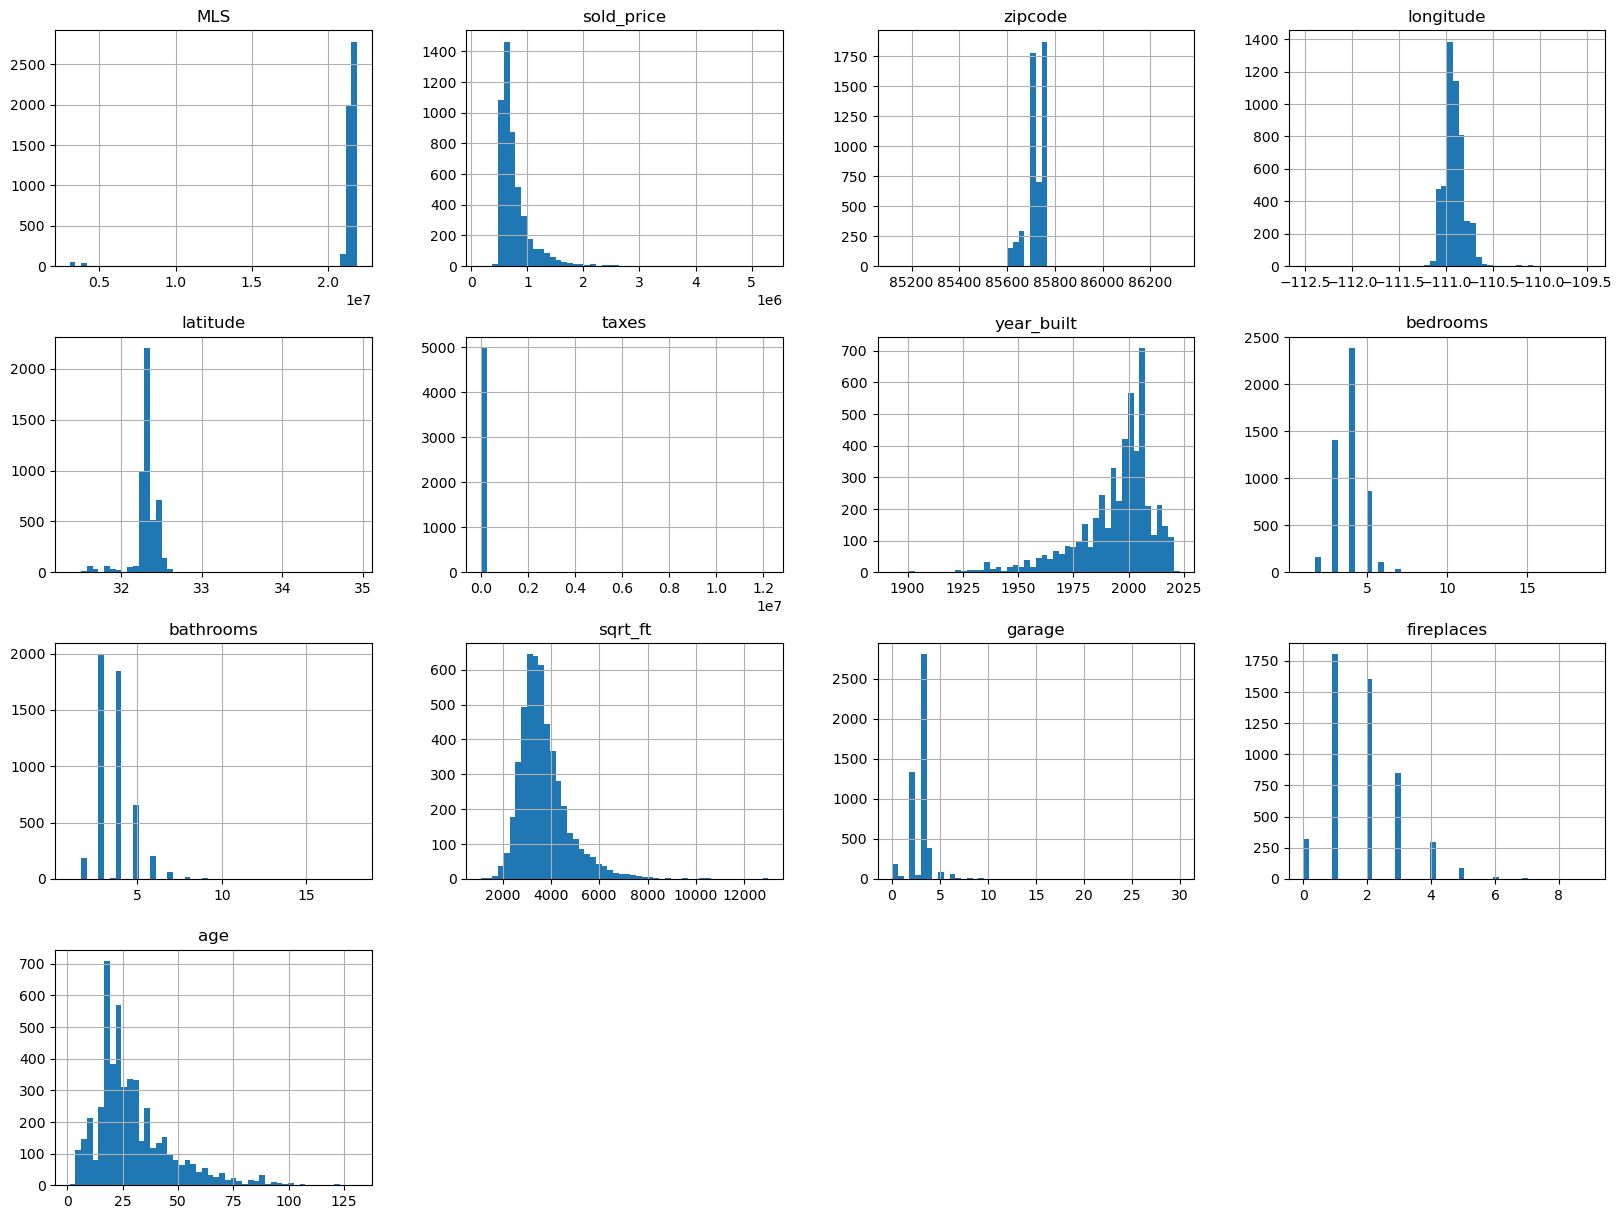

In [58]:
house_df.hist(bins=50, figsize=(20,15))
plt.ticklabel_format(axis='x', style='plain')
plt.show()

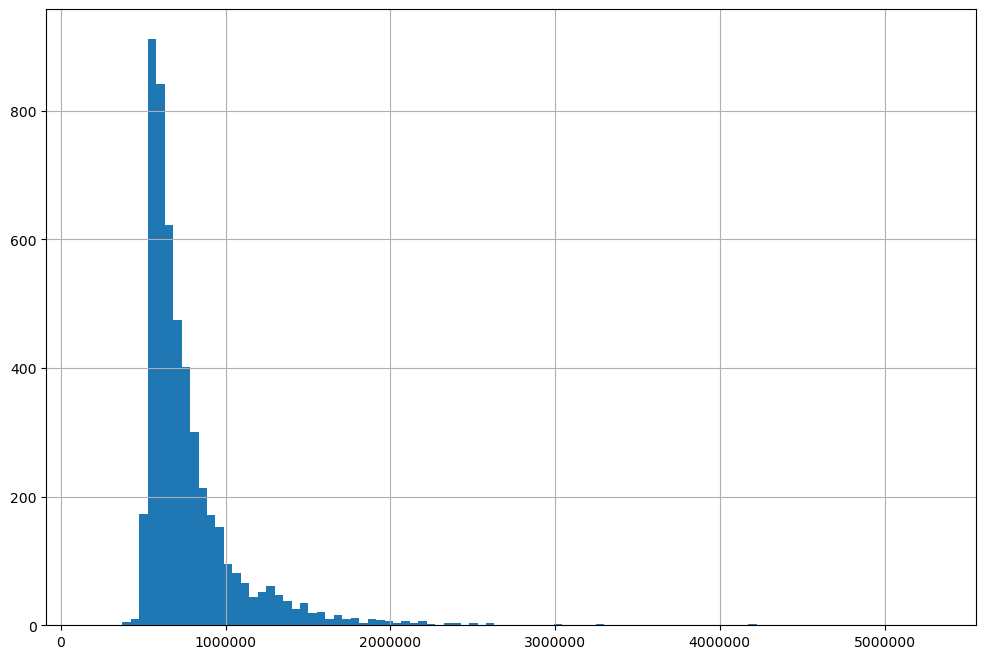

In [59]:
house_df.sold_price.hist(bins=100, figsize=(12,8))
plt.ticklabel_format(axis='x', style='plain')
plt.show()

In [60]:
num_column = ["MLS","sold_price","zipcode","longitude","latitude","taxes","year_built","bedrooms","bathrooms","sqrt_ft","garage","fireplaces","age"]

In [61]:
#house_df.loc[:,num_column].corr().sold_price.sort_values(ascending=False)
house_df.corr(numeric_only=True)#.sold_price.sort_values(ascending=False)

,MLS,sold_price,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,age
MLS,1.000000,0.024295,0.308633,0.113974,0.429159,0.003559,-0.004894,0.074477,0.008193,-0.023649,-0.011462,-0.007147,0.004894
sold_price,0.024295,1.000000,-0.043215,-0.037583,0.031968,0.023528,0.098631,0.160007,0.439501,0.558241,0.100219,0.384989,-0.098631
zipcode,0.308633,-0.043215,1.000000,0.046947,0.449887,-0.001403,0.006679,0.102660,-0.019522,0.008287,0.080814,-0.002654,-0.006679
longitude,0.113974,-0.037583,0.046947,1.000000,-0.258530,-0.000980,-0.111973,0.096421,0.028090,0.070833,-0.041975,0.052081,0.111973
latitude,0.429159,0.031968,0.449887,-0.258530,1.000000,0.000716,0.169894,-0.054333,-0.036881,-0.098377,0.059621,-0.069380,-0.169894
taxes,0.003559,0.023528,-0.001403,-0.000980,0.000716,1.000000,-0.003811,0.005319,0.010815,0.039440,0.005540,0.022366,0.003811
year_built,-0.004894,0.098631,0.006679,-0.111973,0.169894,-0.003811,1.000000,-0.172143,-0.015859,-0.036798,0.315148,-0.130009,-1.000000
bedrooms,0.074477,0.160007,0.102660,0.096421,-0.054333,0.005319,-0.172143,1.000000,0.563868,0.516358,0.095009,0.207394,0.172143
bathrooms,0.008193,0.439501,-0.019522,0.028090,-0.036881,0.010815,-0.015859,0.563868,1.000000,0.715418,0.167821,0.312912,0.015859
sqrt_ft,-0.023649,0.558241,0.008287,0.070833,-0.098377,0.039440,-0.036798,0.516358,0.715418,1.000000,0.208536,0.436655,0.036798


<Axes: >

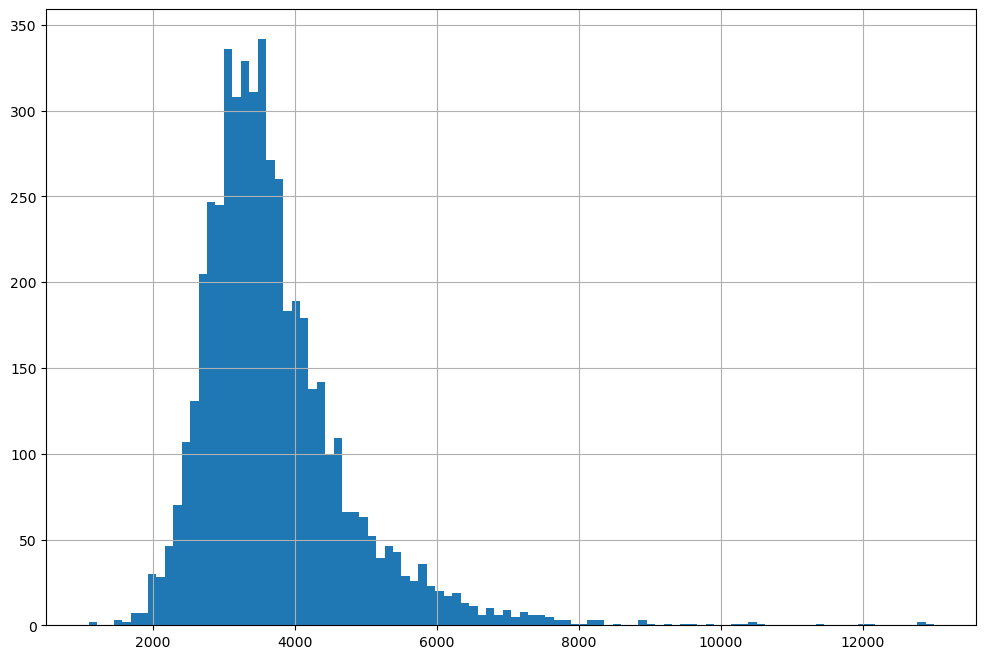

In [62]:
#The sqrt_ft feature might be the most important feature in determining the house price
house_df.sqrt_ft.hist(bins=100, figsize=(12,8))

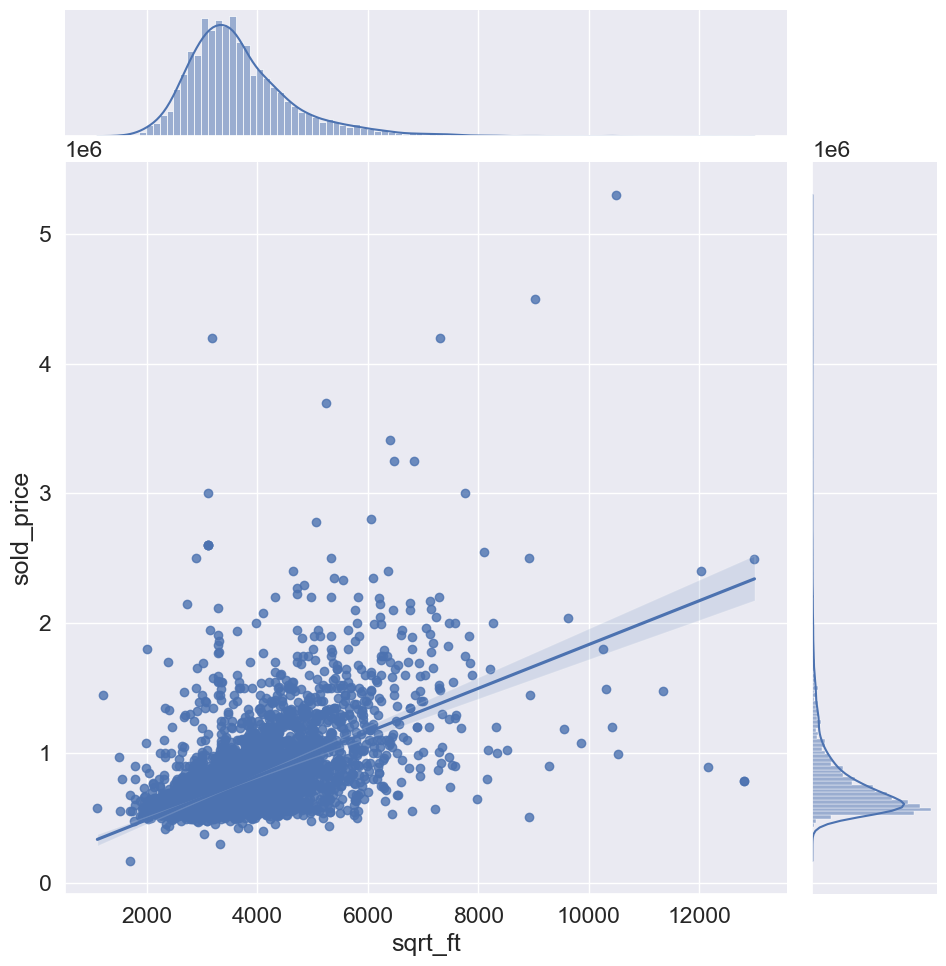

In [63]:
sns.set(font_scale=1.5)
sns.jointplot(data=house_df, x="sqrt_ft", y= "sold_price", kind="reg", height=10)
plt.show()

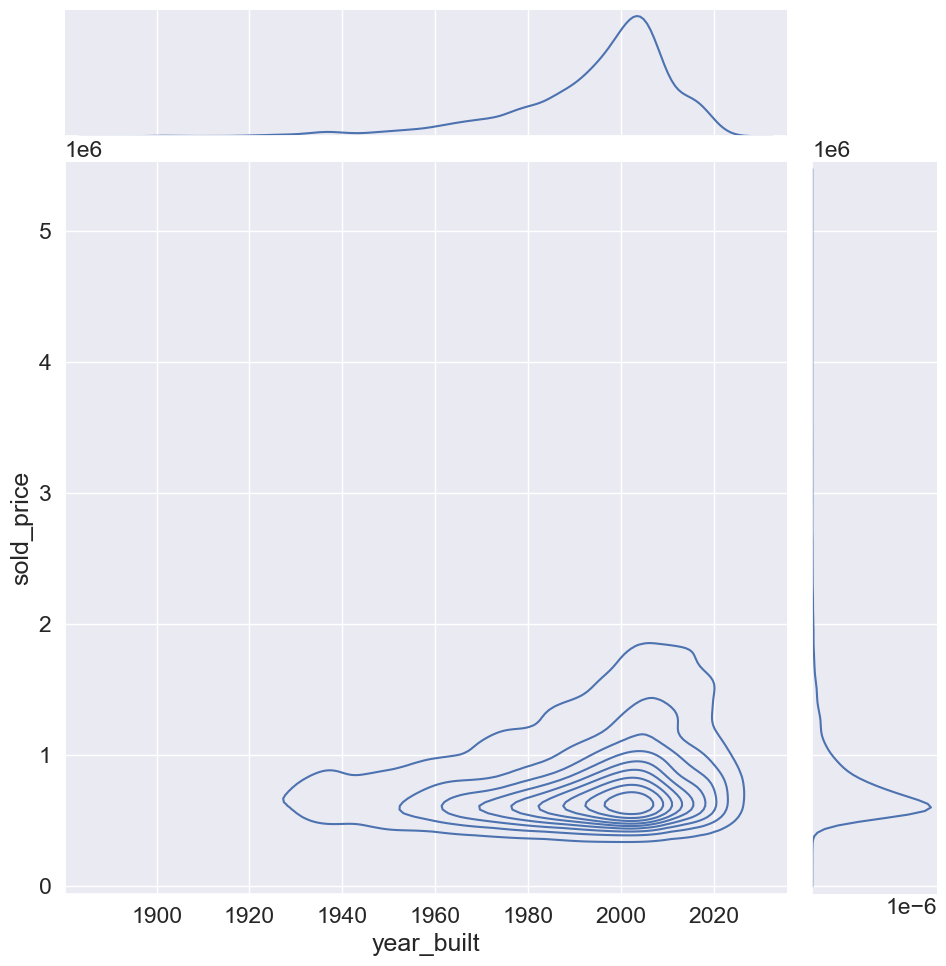

In [64]:
sns.set(font_scale=1.5)
sns.jointplot(data=house_df, x="year_built", y= "sold_price", kind="kde", height=10)
plt.show()

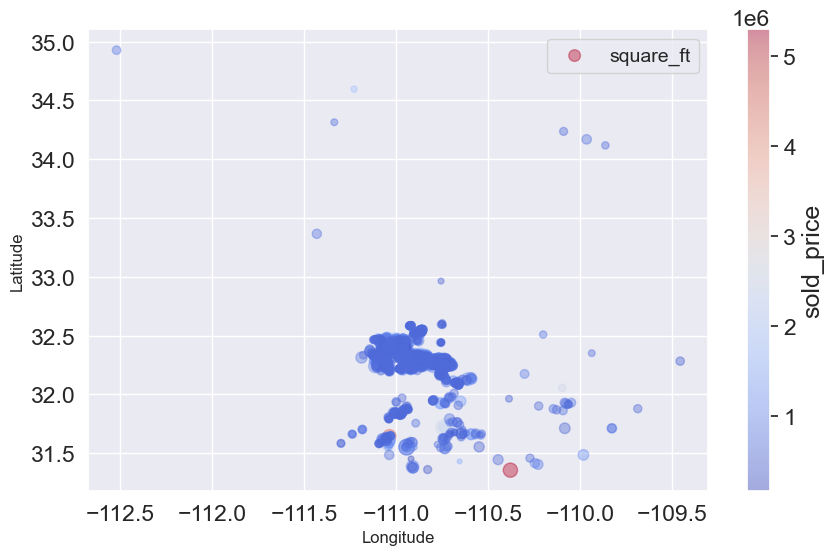

In [65]:
house_df.plot(kind="scatter", x="longitude", y="latitude", s=house_df.sqrt_ft/100, label="square_ft", figsize= (10,6),
              c="sold_price", cmap="coolwarm", colorbar=True, alpha=0.4, sharex=False)
plt.ylabel("Latitude", fontsize=12)
plt.xlabel("Longitude", fontsize = 12)
plt.legend(fontsize=14)
plt.show()

In [66]:
house_df["sqrt_ft_cat"] = pd.qcut(house_df.sqrt_ft, q=[0,0.25,0.5,0.90,1], labels=["Small","Medium","Large", "Very_Large"])

In [67]:
house_df.sqrt_ft_cat.value_counts(normalize=True)

sqrt_ft_cat
Large         0.4002
Small         0.2501
Medium        0.2499
Very_Large    0.0998
Name: proportion, dtype: float64

<Axes: xlabel='sqrt_ft_cat', ylabel='sold_price'>

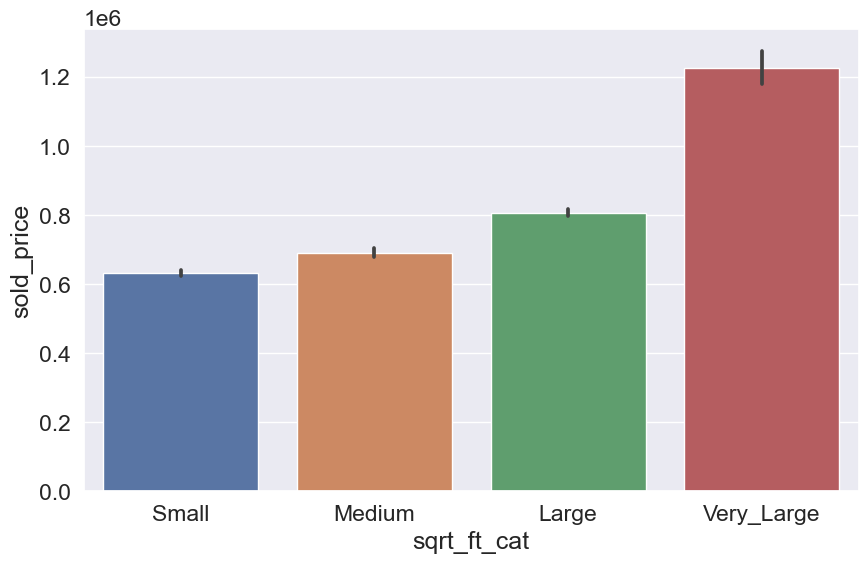

In [68]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(axis='x', style='plain')
sns.set(font_scale=1.5)
sns.barplot(data=house_df, x = "sqrt_ft_cat", y="sold_price", dodge=True)

In [69]:
house_df.corr(numeric_only=True)

,MLS,sold_price,zipcode,longitude,latitude,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,age
MLS,1.000000,0.024295,0.308633,0.113974,0.429159,0.003559,-0.004894,0.074477,0.008193,-0.023649,-0.011462,-0.007147,0.004894
sold_price,0.024295,1.000000,-0.043215,-0.037583,0.031968,0.023528,0.098631,0.160007,0.439501,0.558241,0.100219,0.384989,-0.098631
zipcode,0.308633,-0.043215,1.000000,0.046947,0.449887,-0.001403,0.006679,0.102660,-0.019522,0.008287,0.080814,-0.002654,-0.006679
longitude,0.113974,-0.037583,0.046947,1.000000,-0.258530,-0.000980,-0.111973,0.096421,0.028090,0.070833,-0.041975,0.052081,0.111973
latitude,0.429159,0.031968,0.449887,-0.258530,1.000000,0.000716,0.169894,-0.054333,-0.036881,-0.098377,0.059621,-0.069380,-0.169894
taxes,0.003559,0.023528,-0.001403,-0.000980,0.000716,1.000000,-0.003811,0.005319,0.010815,0.039440,0.005540,0.022366,0.003811
year_built,-0.004894,0.098631,0.006679,-0.111973,0.169894,-0.003811,1.000000,-0.172143,-0.015859,-0.036798,0.315148,-0.130009,-1.000000
bedrooms,0.074477,0.160007,0.102660,0.096421,-0.054333,0.005319,-0.172143,1.000000,0.563868,0.516358,0.095009,0.207394,0.172143
bathrooms,0.008193,0.439501,-0.019522,0.028090,-0.036881,0.010815,-0.015859,0.563868,1.000000,0.715418,0.167821,0.312912,0.015859
sqrt_ft,-0.023649,0.558241,0.008287,0.070833,-0.098377,0.039440,-0.036798,0.516358,0.715418,1.000000,0.208536,0.436655,0.036798


<function matplotlib.pyplot.show(close=None, block=None)>

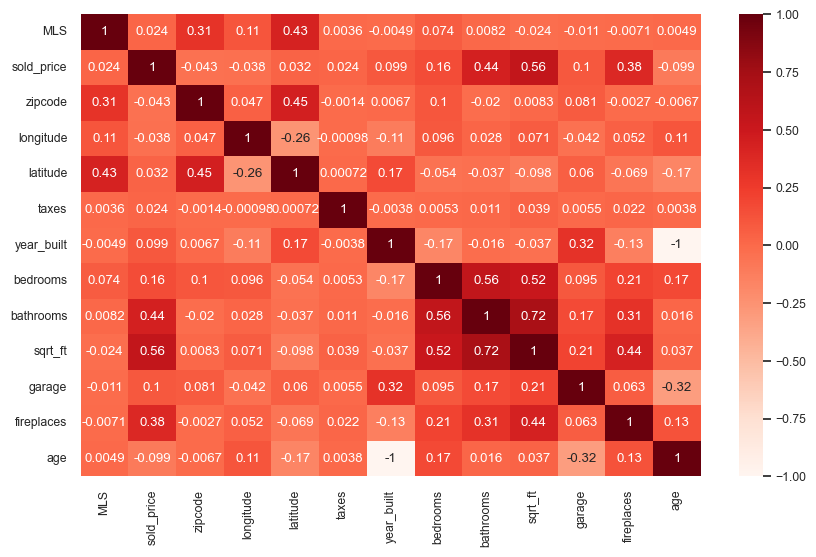

In [70]:
plt.figure(figsize=(10,6))
sns.set(font_scale=.8)
sns.heatmap(house_df.corr(numeric_only=True), annot=True, cmap="Reds")
plt.show

In [71]:
house_df.to_csv("cleaned_raw_house_data.csv")